# 패션 이미지 데이터(10가지)를 분류 

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = fashion_mnist.load_data()
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

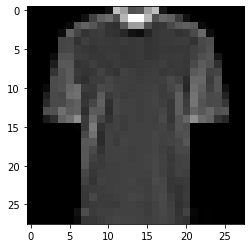

In [6]:
plt.imshow(X_train[59998], cmap='gray')
# imshow : 이미지 데이터를 그림으로 출력해주는 명령
# cmap = 'gray' : 이미지를 흑백으로 전환시켜주는 명령

#### 과대적합을 확인하기 위해 train데이터에서 검증셋을 분리해서 학습시 같이 출력시켜보자!

In [7]:
# 무조건 train, test, 셋만 나눠주는게 아니라 데이터를 일정 비율로 나누어주는 명령
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train, 
                                                  random_state=3)

In [9]:
print(X_train.shape)
print(X_val.shape)                   # 검증용 문제
print(y_train.shape)
print(y_val.shape)           # 검증용 정답

(45000, 28, 28)
(15000, 28, 28)
(45000,)
(15000,)


### 신경망 설계

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten : 데이터를 1차원으로 자동적으로 펴주는 역할을 하는 모듈


In [11]:
model = Sequential()

#Flatten 명령을 통해서 한번에 바로 이미지 데이터를 1차원으로 펴줌
model.add(Flatten(input_shape=(28,28)))

# 중간층
model.add(Dense(450, activation="sigmoid")) # 하나의 층
model.add(Dense(200, activation="sigmoid")) # 하나의 층
model.add(Dense(100, activation="sigmoid")) # 하나의 층
model.add(Dense(50, activation="sigmoid")) # 하나의 층

model.add(Dense(10, activation="softmax")) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 450)               353250    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               90200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 469,110
Trainable params: 469,110
Non-trainable params: 0
__________________________________________________

In [12]:
# 2. 학습 / 평가 방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수(비용함수)
# categorical_crossentropy : 다중분류에 사용하는 손실함수
# -> 오차의 평균을 구하는것은 mse와 같지만 0~1사이 값으로 변환 후 평균오차를 구함
# 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",   # 최적화 함수 : 확률적경사하강법 사용  // SGD도 이외에도 Adam도 있음 
              metrics=["acc"]       # metrics : 평가방법을 설정 (정확도 체크)
                                    # 분류 문제이기 때문에 정확도를 확인
             )

# 회귀는 오차만 확인하면 되지만 분류는 정확도까지 확인해줘야 함!!!!!

In [13]:
h1 = model.fit(X_train,y_train,
              epochs=50,  # epochs : 학습 횟수를 설정
              validation_data = (X_val, y_val), # 검증용 데이터셋을 추가해주는 명령
              batch_size=32) # 한번에 데이터를 학습시키는 최소 단위 // 높을 수록 러프하게 학습되고 낮을수고 자세히 학습
# verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력x, 1:bar형태(디폴트, 2 : ))

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 4s 94us/sample - loss: 1.0808 - acc: 0.5834 - val_loss: 0.8695 - val_acc: 0.6451
Epoch 2/50
45000/45000 [==============================] - 3s 67us/sample - loss: 0.8442 - acc: 0.6630 - val_loss: 0.7769 - val_acc: 0.6944
Epoch 3/50
45000/45000 [==============================] - 3s 69us/sample - loss: 0.7889 - acc: 0.6833 - val_loss: 0.8344 - val_acc: 0.6615
Epoch 4/50
45000/45000 [==============================] - 3s 70us/sample - loss: 0.7596 - acc: 0.6917 - val_loss: 0.7245 - val_acc: 0.7186
Epoch 5/50
45000/45000 [==============================] - 3s 65us/sample - loss: 0.7361 - acc: 0.7134 - val_loss: 0.6934 - val_acc: 0.7377
Epoch 6/50
45000/45000 [==============================] - 3s 64us/sample - loss: 0.7165 - acc: 0.7180 - val_loss: 0.7314 - val_acc: 0.7117
Epoch 7/50
45000/45000 [==============================] - 3s 63us/sample - loss: 0.7201 - acc: 0.7080 - val_loss: 0.

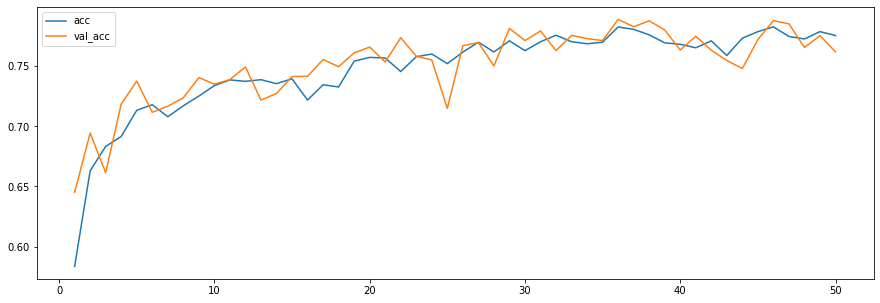

In [14]:
plt.figure(figsize=(15,5))

plt.plot(range(1,51),
        h1.history['acc'],
        label = 'acc'
        )

plt.plot(range(1,51),
        h1.history['val_acc'],
        label = 'val_acc'
        )
plt.legend()
plt.show()

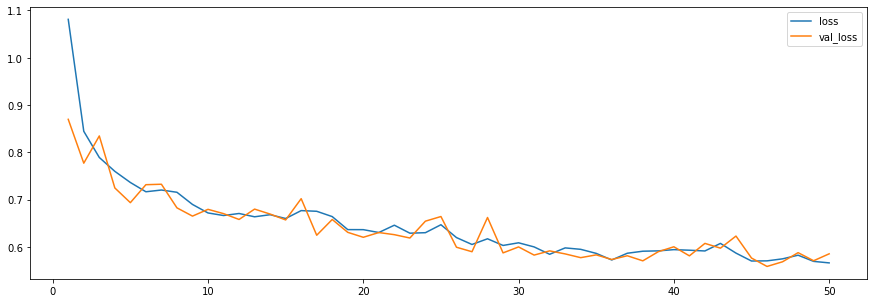

In [15]:
plt.figure(figsize=(15,5))

plt.plot(range(1,51),
        h1.history['loss'],
        label = 'loss'
        )

plt.plot(range(1,51),
        h1.history['val_loss'],
        label = 'val_loss'
        )
plt.legend()
plt.show()

In [16]:
model.evaluate(X_test , y_test_one_hot)

NameError: name 'y_test_one_hot' is not defined